## Rangel Dario

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns
from scipy.stats import linregress

In [2]:
# Set path for to locate dataset
nba1 = "../league_data/general_1-50.csv"
nba2 = "../league_data/general_51-100.csv" 
nba3 = "../league_data/general_101-150.csv"
nba4 = "../league_data/general_151-200.csv"


In [3]:
#
nba01 = pd.read_csv(nba1)
nba02 = pd.read_csv(nba2)
nba03 = pd.read_csv(nba3)
nba04 = pd.read_csv(nba4)
magic23 = pd.read_csv("../orlando_data/magic_22_23.csv")
magic22_23_df = magic23

In [4]:
# Combine the data into a single dataset
frames = [nba01,nba02,nba03,nba04]
league_df = pd.concat(frames)

In [5]:
# Dataframe of the best 200 players in the NBA stat averages per game of the 2023 season
league_df.head(75)

,Unnamed: 0,PLAYER,TEAM,Position,AGE,Games Played,Wins,Loses,Minutes,Points,...,Rebounds,Assists,Turnover,Steals,Blocks,Personal Foul,Fantsy Points,Double Doubles,Triple Doubles,Plus-Minus
0,1,Joel Embiid,PHI,Center,29,66,43,23,34.6,33.1,...,10.2,4.2,3.4,1.0,1.7,3.1,56.2,39,1,6.4
1,2,Luka Doncic,DAL,Forward,24,66,33,33,36.2,32.4,...,8.6,8.0,3.6,1.4,0.5,2.5,56.8,36,10,1.9
2,3,Damian Lillard,POR,Guard,32,58,27,31,36.3,32.2,...,4.8,7.3,3.3,0.9,0.3,1.9,49.1,16,2,1.8
3,4,Shai Gilgeous-Alexander,OKC,Guard,24,68,33,35,35.5,31.4,...,4.8,5.5,2.8,1.6,1.0,2.8,50.4,3,0,2.2
4,5,Giannis Antetokounmpo,MIL,Forward,28,63,47,16,32.1,31.1,...,11.8,5.7,3.9,0.8,0.8,3.1,54.8,46,6,5.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,71,Nikola Vucevic,CHI,Center,32,82,40,42,33.5,17.6,...,11.0,3.2,1.7,0.7,0.7,2.2,38.3,51,1,-0.2
21,72,Michael Porter Jr.,DEN,Forward,24,62,41,21,29.0,17.4,...,5.5,1.0,1.1,0.6,0.5,1.9,27.7,3,0,6.7
22,73,Gary Trent Jr.,TOR,Guard,24,66,31,35,32.1,17.4,...,2.6,1.6,0.8,1.6,0.2,1.5,27.5,0,0,-0.8
23,74,Spencer Dinwiddie,BKN,Guard,30,79,41,38,34.5,17.3,...,3.4,6.5,1.8,0.8,0.3,2.4,32.8,9,0,-0.1


In [6]:
#Name of the columns
league_df.columns

Index(['Unnamed: 0', 'PLAYER', 'TEAM', 'Position', 'AGE', 'Games Played',
       'Wins', 'Loses', 'Minutes', 'Points', 'Field Goals Made',
       'Field Goals Attmepted ', 'Field Goal %', '3 Points Made',
       '3 Points Attempted', '3 Point %', 'Free Throw Made',
       'Free throw Attempted', 'Free Throw %', 'Offensive Rebound',
       'Defensive Rebound', 'Rebounds', 'Assists ', 'Turnover', 'Steals',
       'Blocks', 'Personal Foul', 'Fantsy Points', 'Double Doubles',
       'Triple Doubles', 'Plus-Minus'],
      dtype='object')

In [7]:
#DataFrame of the Orlando Magic Team of 2023
magic23.head(5)

,Unnamed: 0,PLAYER,TEAM,Position,AGE,Games Played,Wins,Loses,Minutes,Points,...,Rebounds,Assists,Turnover,Steals,Blocks,Personal Foul,Fantsy Points,Double Doubles,Triple Doubles,Plus-Minus
0,58,Paolo Banchero,ORL,Forwards,20,72,31,41,33.7,20.0,...,6.9,3.7,2.8,0.8,0.5,2.2,35.2,14,0,-3.0
1,66,Franz Wagner,ORL,Forwards,21,80,33,47,32.6,18.6,...,4.1,3.5,2.1,1.0,0.2,2.3,30.2,2,0,0.6
2,93,Wendell Carter Jr.,ORL,Center,24,57,26,31,29.6,15.2,...,8.7,2.3,1.9,0.5,0.6,2.8,30.6,21,0,-0.7
3,111,Markelle Fultz,ORL,Guard,24,60,29,31,29.6,14.0,...,3.9,5.7,2.3,1.5,0.4,2.2,30.5,3,0,-2.2
4,120,Cole Anthony,ORL,Guard,22,60,28,32,25.9,13.0,...,4.8,3.9,1.5,0.6,0.5,2.6,26.5,1,0,-0.4


In [8]:
#Replaced a string inside the column of the magic file to match the other dataset
magic23["Position"] = magic23["Position"].str.replace("Forwards","Forward", regex=False)

magic23.head(14)

,Unnamed: 0,PLAYER,TEAM,Position,AGE,Games Played,Wins,Loses,Minutes,Points,...,Rebounds,Assists,Turnover,Steals,Blocks,Personal Foul,Fantsy Points,Double Doubles,Triple Doubles,Plus-Minus
0,58,Paolo Banchero,ORL,Forward,20,72,31,41,33.7,20.0,...,6.9,3.7,2.8,0.8,0.5,2.2,35.2,14,0,-3.0
1,66,Franz Wagner,ORL,Forward,21,80,33,47,32.6,18.6,...,4.1,3.5,2.1,1.0,0.2,2.3,30.2,2,0,0.6
2,93,Wendell Carter Jr.,ORL,Center,24,57,26,31,29.6,15.2,...,8.7,2.3,1.9,0.5,0.6,2.8,30.6,21,0,-0.7
3,111,Markelle Fultz,ORL,Guard,24,60,29,31,29.6,14.0,...,3.9,5.7,2.3,1.5,0.4,2.2,30.5,3,0,-2.2
4,120,Cole Anthony,ORL,Guard,22,60,28,32,25.9,13.0,...,4.8,3.9,1.5,0.6,0.5,2.6,26.5,1,0,-0.4
5,163,Moritz Wagner,ORL,Center,25,57,27,30,19.5,10.5,...,4.5,1.5,1.2,0.6,0.2,2.4,19.6,3,0,-0.5
6,180,Jalen Suggs,ORL,Guard,21,53,20,33,23.5,9.9,...,3.0,2.9,1.8,1.3,0.5,2.3,21.5,0,0,-0.8
7,212,Bol Bol,ORL,Center,23,70,26,44,21.5,9.1,...,5.8,1.0,1.6,0.4,1.2,1.3,20.8,6,0,-2.1
8,233,Gary Harris,ORL,Guard,28,48,22,26,24.7,8.3,...,2.0,1.2,0.6,0.9,0.3,1.9,15.5,0,0,-1.8
9,301,Jay Scrubb,ORL,Guard,22,2,1,1,15.1,6.5,...,3.0,0.5,1.5,1.0,0.0,1.0,12.4,0,0,-8.0


In [9]:
#League average of players by position
league_positions_age = league_df.groupby(['Position'])["AGE"].mean()

In [10]:
#League average games played by position
league_positions_gp = league_df.groupby(['Position'])["Games Played"].mean()

In [11]:
#League average minutes played by position
league_positions_mins = league_df.groupby(['Position'])["Minutes"].mean()

In [12]:
#League average points per game by position
league_positions_ppg = league_df.groupby(['Position'])["Points"].mean()
league_positions_ppg

Position
Center     15.687097
Forward    16.444737
Guard      16.307527
Name: Points, dtype: float64

In [13]:
#League average field goals attmepted per game by position
league_positions_fga = league_df.groupby(['Position'])["Field Goals Attmepted "].mean()

In [14]:
#League average field goals percentage per game by position
league_positions_fgp = league_df.groupby(['Position'])["Field Goal %"].mean()

In [15]:
#League average 3 points attmepted per game by position
league_positions_3pa = league_df.groupby(['Position'])["3 Points Attempted"].mean()

In [16]:
#League average 3 points percentage per game by position
league_positions_3pp = league_df.groupby(['Position'])["3 Point %"].mean()

In [17]:
#League average free throws attmepted per game by position
league_positions_fta = league_df.groupby(['Position'])["Free throw Attempted"].mean()

In [18]:
#League average free throws percentage per game by position
league_positions_ftp = league_df.groupby(['Position'])["Free Throw %"].mean()

In [19]:
#League average offensive rebounds per game by position
league_positions_orb = league_df.groupby(['Position'])["Offensive Rebound"].mean()

In [20]:
#League average defensive rebounds per game by position
league_positions_drb = league_df.groupby(['Position'])["Defensive Rebound"].mean()

In [21]:
#League average assists per game by position
league_positions_ast = league_df.groupby(['Position'])["Assists "].mean()

In [22]:
#League average steals per game by position
league_positions_to = league_df.groupby(['Position'])["Turnover"].mean()

In [23]:
#League average turnovers per game by position
league_positions_stl = league_df.groupby(['Position'])["Steals"].mean()

In [24]:
#League average blocks per game by position
league_positions_blk = league_df.groupby(['Position'])["Blocks"].mean()

In [25]:
#League average personal foul per game by position
league_positions_pf = league_df.groupby(['Position'])["Personal Foul"].mean()

In [26]:
#League average plus-minus per game by position
league_positions_eff = league_df.groupby(['Position'])["Plus-Minus"].mean()

In [27]:
#Made New DF with the average of each player but organized by position
league_average_position = pd.DataFrame({"Age":league_positions_age,"Games Played":league_positions_gp,
                                        "Minutes":league_positions_mins,"Points":league_positions_ppg,
                                        "Field Goals Attmepted":league_positions_fga,"Field Goal %":league_positions_fgp,
                                       "3 Points Attempted":league_positions_3pa,"3 Point %":league_positions_3pp,
                                       "Free throw Attempted":league_positions_fta,"Free Throw %":league_positions_ftp,
                                       "Offensive Rebound":league_positions_orb,"Defensive Rebound":league_positions_drb,
                                      "Assists":league_positions_ast,"Steals":league_positions_stl,"Turnover":league_positions_to,
                                        "Blocks":league_positions_blk,"Personal Foul":league_positions_pf,
                                        "Plus-Minus":league_positions_eff})
#Formated DF
league_average_position["Age"]=league_average_position["Age"].map("{:,.1f}".format)
league_average_position["Games Played"]=league_average_position["Games Played"].map("{:,.1f}".format)
league_average_position["Minutes"]=league_average_position["Minutes"].map("{:,.2f}".format)
league_average_position["Points"]=league_average_position["Points"].map("{:,.2f}".format)
league_average_position["Field Goals Attmepted"]=league_average_position["Field Goals Attmepted"].map("{:,.2f}".format)
league_average_position["Field Goal %"]=league_average_position["Field Goal %"].map("{:,.2f}".format)
league_average_position["3 Points Attempted"]=league_average_position["3 Points Attempted"].map("{:,.2f}".format)
league_average_position["3 Point %"]=league_average_position["3 Point %"].map("{:,.2f}".format)
league_average_position["Free throw Attempted"]=league_average_position["Free throw Attempted"].map("{:,.2f}".format)
league_average_position["Free Throw %"]=league_average_position["Free Throw %"].map("{:,.2f}".format)
league_average_position["Offensive Rebound"]=league_average_position["Offensive Rebound"].map("{:,.2f}".format)
league_average_position["Defensive Rebound"]=league_average_position["Defensive Rebound"].map("{:,.2f}".format)
league_average_position["Assists"]=league_average_position["Assists"].map("{:,.2f}".format)
league_average_position["Steals"]=league_average_position["Steals"].map("{:,.2f}".format)
league_average_position["Turnover"]=league_average_position["Turnover"].map("{:,.2f}".format)
league_average_position["Blocks"]=league_average_position["Blocks"].map("{:,.2f}".format)
league_average_position["Personal Foul"]=league_average_position["Personal Foul"].map("{:,.2f}".format)
league_average_position["Plus-Minus"]=league_average_position["Plus-Minus"].map("{:,.2f}".format)


league_average_position.head(5)

,Age,Games Played,Minutes,Points,Field Goals Attmepted,Field Goal %,3 Points Attempted,3 Point %,Free throw Attempted,Free Throw %,Offensive Rebound,Defensive Rebound,Assists,Steals,Turnover,Blocks,Personal Foul,Plus-Minus
Position,,,,,,,,,,,,,,,,,,
Center,27.3,63.9,28.31,15.69,10.69,56.33,2.31,26.56,3.84,74.54,2.15,6.35,2.58,0.71,1.83,1.11,2.79,0.78
Forward,25.3,64.6,29.98,16.44,12.49,48.25,4.51,35.21,3.56,79.09,1.20,4.21,3.03,0.83,1.79,0.53,2.27,-0.27
Guard,26.6,62.2,29.45,16.31,12.69,45.60,5.36,36.54,3.27,81.02,0.73,3.15,4.35,0.98,1.90,0.32,2.08,0.47


In [28]:
#Used Loc to have the ability to call items by position from average by posistion DF(The df above)
league_average_forward = league_average_position.loc["Forward"].astype(float)

In [29]:
#Used Loc to have the ability to call items by position from average by posistion DF(The df above)
league_average_center = league_average_position.loc["Center"].astype(float)

In [30]:
#Used Loc to have the ability to call items by position from average by posistion DF(The df above)
league_average_guard = league_average_position.loc["Guard"].astype(float)

In [31]:
#Made DF from the Magic23 DF and grouped it by player
orl_players23 = magic23.groupby(["PLAYER"]).mean(numeric_only=True)
orl_players23

,Unnamed: 0,AGE,Games Played,Wins,Loses,Minutes,Points,Field Goals Made,Field Goals Attmepted,Field Goal %,...,Rebounds,Assists,Turnover,Steals,Blocks,Personal Foul,Fantsy Points,Double Doubles,Triple Doubles,Plus-Minus
PLAYER,,,,,,,,,,,,,,,,,,,,,
Admiral Schofield,402.0,26.0,37.0,14.0,23.0,12.2,4.2,1.5,3.3,45.1,...,1.7,0.8,0.4,0.2,0.1,1.6,8.1,0.0,0.0,-2.1
Bol Bol,212.0,23.0,70.0,26.0,44.0,21.5,9.1,3.7,6.8,54.6,...,5.8,1.0,1.6,0.4,1.2,1.3,20.8,6.0,0.0,-2.1
Caleb Houstan,422.0,20.0,51.0,20.0,31.0,15.9,3.8,1.3,3.6,36.3,...,1.9,0.6,0.4,0.2,0.1,1.2,7.8,0.0,0.0,-1.6
Chuma Okeke,377.0,24.0,27.0,8.0,19.0,19.2,4.7,1.6,4.5,35.2,...,3.6,1.4,0.6,0.7,0.4,1.5,13.8,0.0,0.0,-4.4
Cole Anthony,120.0,22.0,60.0,28.0,32.0,25.9,13.0,4.6,10.2,45.4,...,4.8,3.9,1.5,0.6,0.5,2.6,26.5,1.0,0.0,-0.4
Franz Wagner,66.0,21.0,80.0,33.0,47.0,32.6,18.6,6.8,14.0,48.5,...,4.1,3.5,2.1,1.0,0.2,2.3,30.2,2.0,0.0,0.6
Gary Harris,233.0,28.0,48.0,22.0,26.0,24.7,8.3,2.9,6.4,45.0,...,2.0,1.2,0.6,0.9,0.3,1.9,15.5,0.0,0.0,-1.8
Goga Bitadze,394.0,23.0,38.0,13.0,25.0,12.0,4.4,1.8,3.3,55.2,...,3.6,1.0,0.6,0.4,0.7,1.7,13.0,2.0,0.0,0.7
Jalen Suggs,180.0,21.0,53.0,20.0,33.0,23.5,9.9,3.5,8.4,41.9,...,3.0,2.9,1.8,1.3,0.5,2.3,21.5,0.0,0.0,-0.8


In [32]:
#Used Loc to get each of the Gaurds in the DF above so I can access each row
m_fultz = orl_players23.loc["Markelle Fultz"].astype(float)
mc_will=orl_players23.loc["Michael Carter-Williams"].astype(float)
j_sug=orl_players23.loc["Jalen Suggs"].astype(float)
g_har=orl_players23.loc["Gary Harris"].astype(float)
c_ant=orl_players23.loc["Cole Anthony"].astype(float)
j_scrub=orl_players23.loc["Jay Scrubb"].astype(float)

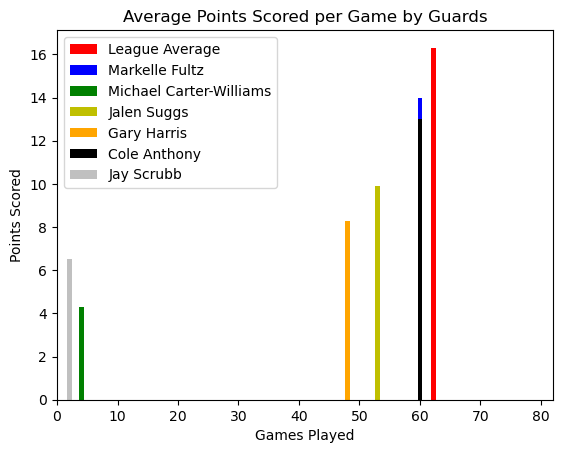

In [33]:
# Used the games plated as an X, then what i wanted to measure as a Y, and made a bar graph
plt.bar(league_average_guard["Games Played"],league_average_guard["Points"],color="r",label="League Average")
plt.bar(m_fultz["Games Played"],m_fultz["Points"],color="blue",label="Markelle Fultz")
plt.bar(mc_will["Games Played"],mc_will["Points"],color="g",label="Michael Carter-Williams")
plt.bar(j_sug["Games Played"],j_sug["Points"],color="y",label="Jalen Suggs")
plt.bar(g_har["Games Played"],g_har["Points"],color="orange",label="Gary Harris")
plt.bar(c_ant["Games Played"],c_ant["Points"],color="black",label="Cole Anthony")
plt.bar(j_scrub["Games Played"],j_scrub["Points"],color="silver",label="Jay Scrubb")

plt.title("Average Points Scored per Game by Guards")
plt.xlabel("Games Played")
plt.ylabel("Points Scored")
plt.legend()
plt.xlim(0,82)
plt.show()

## Bethel Brenton
Linear Regression to determine which KPI(s) have a strong positive relationship with wins.

In [34]:
# Display the data table for preview
magic22_23_df.head(100)

,Unnamed: 0,PLAYER,TEAM,Position,AGE,Games Played,Wins,Loses,Minutes,Points,...,Rebounds,Assists,Turnover,Steals,Blocks,Personal Foul,Fantsy Points,Double Doubles,Triple Doubles,Plus-Minus
0,58,Paolo Banchero,ORL,Forward,20,72,31,41,33.7,20.0,...,6.9,3.7,2.8,0.8,0.5,2.2,35.2,14,0,-3.0
1,66,Franz Wagner,ORL,Forward,21,80,33,47,32.6,18.6,...,4.1,3.5,2.1,1.0,0.2,2.3,30.2,2,0,0.6
2,93,Wendell Carter Jr.,ORL,Center,24,57,26,31,29.6,15.2,...,8.7,2.3,1.9,0.5,0.6,2.8,30.6,21,0,-0.7
3,111,Markelle Fultz,ORL,Guard,24,60,29,31,29.6,14.0,...,3.9,5.7,2.3,1.5,0.4,2.2,30.5,3,0,-2.2
4,120,Cole Anthony,ORL,Guard,22,60,28,32,25.9,13.0,...,4.8,3.9,1.5,0.6,0.5,2.6,26.5,1,0,-0.4
5,163,Moritz Wagner,ORL,Center,25,57,27,30,19.5,10.5,...,4.5,1.5,1.2,0.6,0.2,2.4,19.6,3,0,-0.5
6,180,Jalen Suggs,ORL,Guard,21,53,20,33,23.5,9.9,...,3.0,2.9,1.8,1.3,0.5,2.3,21.5,0,0,-0.8
7,212,Bol Bol,ORL,Center,23,70,26,44,21.5,9.1,...,5.8,1.0,1.6,0.4,1.2,1.3,20.8,6,0,-2.1
8,233,Gary Harris,ORL,Guard,28,48,22,26,24.7,8.3,...,2.0,1.2,0.6,0.9,0.3,1.9,15.5,0,0,-1.8
9,301,Jay Scrubb,ORL,Guard,22,2,1,1,15.1,6.5,...,3.0,0.5,1.5,1.0,0.0,1.0,12.4,0,0,-8.0


In [35]:
#Create a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,y_title,text_coordinates):
    
    # Run regression on Southern Hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Wins")
    plt.ylabel(y_title)
    print(f"The r-squared is: {rvalue}")
    plt.show()
    return rvalue

The r-squared is: 0.3152440804224083


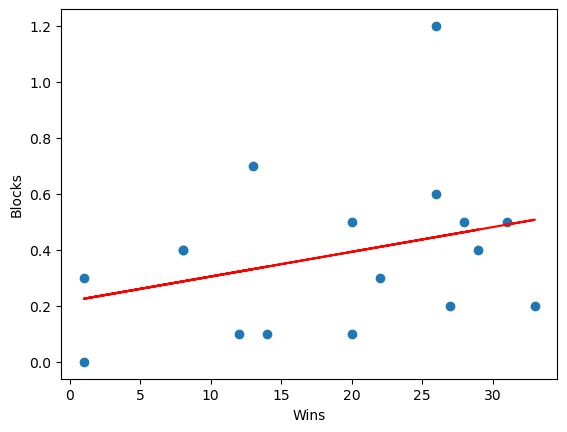

,KPI,r
0,Blocks,0.315244


In [36]:
x_values = magic22_23_df ["Wins"]
y_values = magic22_23_df ["Blocks"]
r = plot_linear_regression(x_values,y_values,'Blocks',(2,90))

magic_rvalues = pd.DataFrame({'KPI':["Blocks"], 'r':[r]}) 
magic_rvalues.head()

The r-squared is: 0.150973810106545


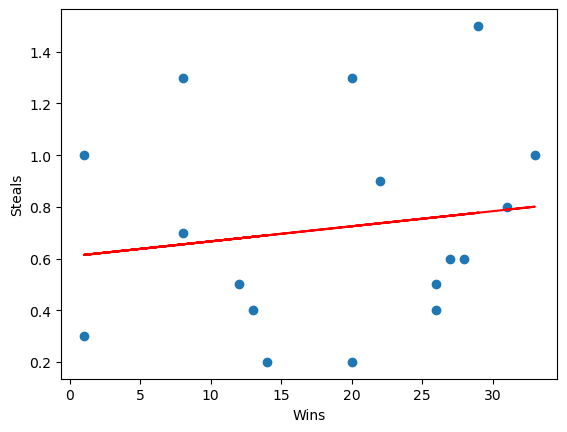

In [37]:
x_values = magic22_23_df ["Wins"]
y_values = magic22_23_df ["Steals"]
r = plot_linear_regression(x_values,y_values,'Steals',(2,90))

df_new_row = pd.DataFrame({'KPI':["Steals"], 'r':[r]}) 
magic_rvalues = pd.concat([magic_rvalues, df_new_row])

The r-squared is: 0.5609280826178947


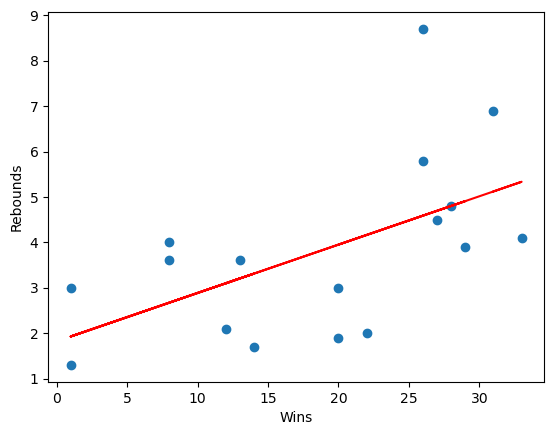

In [38]:
x_values = magic22_23_df ["Wins"]
y_values = magic22_23_df ["Rebounds"]
r = plot_linear_regression(x_values,y_values,'Rebounds',(20,90))

df_new_row = pd.DataFrame({'KPI':["Rebounds"], 'r':[r]}) 
magic_rvalues = pd.concat([magic_rvalues, df_new_row])

The r-squared is: 0.707046603848825


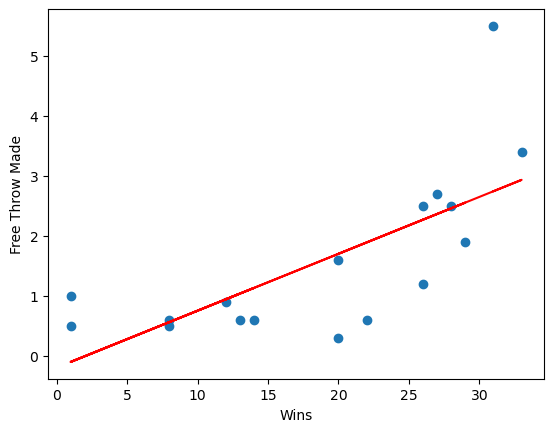

In [39]:
x_values = magic22_23_df ["Wins"]
y_values = magic22_23_df ["Free Throw Made"]
r = plot_linear_regression(x_values,y_values,'Free Throw Made',(20,90))

df_new_row = pd.DataFrame({'KPI':["Free Throw Made"], 'r':[r]}) 
magic_rvalues = pd.concat([magic_rvalues, df_new_row])

The r-squared is: 0.45631901528044666


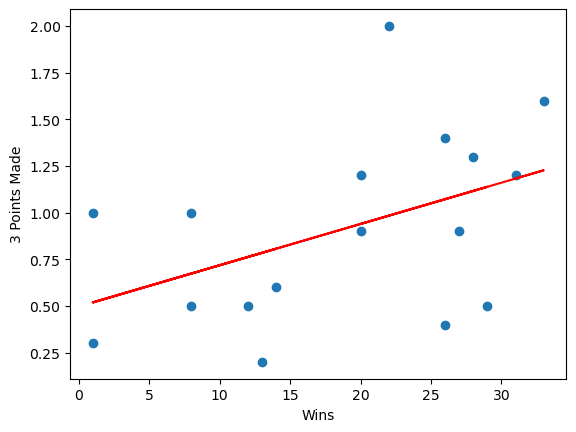

In [40]:
x_values = magic22_23_df ["Wins"]
y_values = magic22_23_df ["3 Points Made"]
r = plot_linear_regression(x_values,y_values,'3 Points Made',(10,90))

df_new_row = pd.DataFrame({'KPI':["3 Points Made"], 'r':[r]}) 
magic_rvalues = pd.concat([magic_rvalues, df_new_row])

The r-squared is: 0.6180708815640963


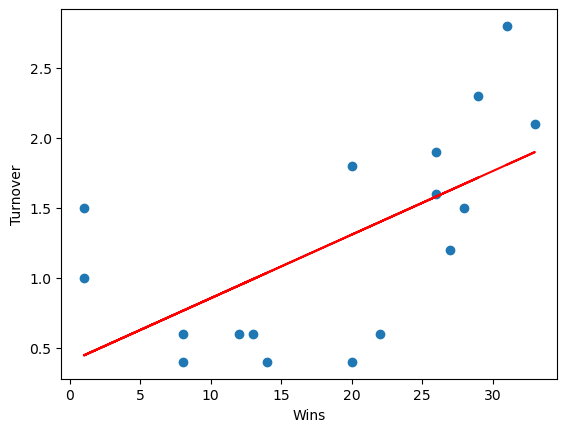

In [41]:
x_values = magic22_23_df ["Wins"]
y_values = magic22_23_df ["Turnover"]
r = plot_linear_regression(x_values,y_values,'Turnover',(10,90))

df_new_row = pd.DataFrame({'KPI':["Turnover"], 'r':[r]}) 
magic_rvalues = pd.concat([magic_rvalues, df_new_row])

The r-squared is: 0.8077308331911343


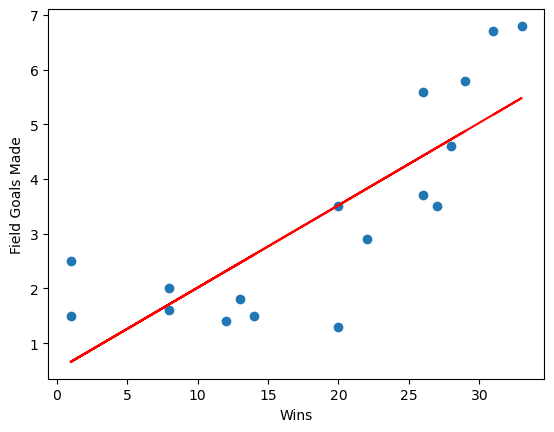

In [42]:
x_values = magic22_23_df ["Wins"]
y_values = magic22_23_df ["Field Goals Made"]
r = plot_linear_regression(x_values,y_values,'Field Goals Made',(15,90))

df_new_row = pd.DataFrame({'KPI':["Field Goals Made"], 'r':[r]}) 
magic_rvalues = pd.concat([magic_rvalues, df_new_row], ignore_index=True)

In [43]:
magic_rvalues = magic_rvalues.sort_values(by='r', ascending=True, ignore_index=False)
magic_rvalues.head(10)

,KPI,r
1,Steals,0.150974
0,Blocks,0.315244
4,3 Points Made,0.456319
2,Rebounds,0.560928
5,Turnover,0.618071
3,Free Throw Made,0.707047
6,Field Goals Made,0.807731


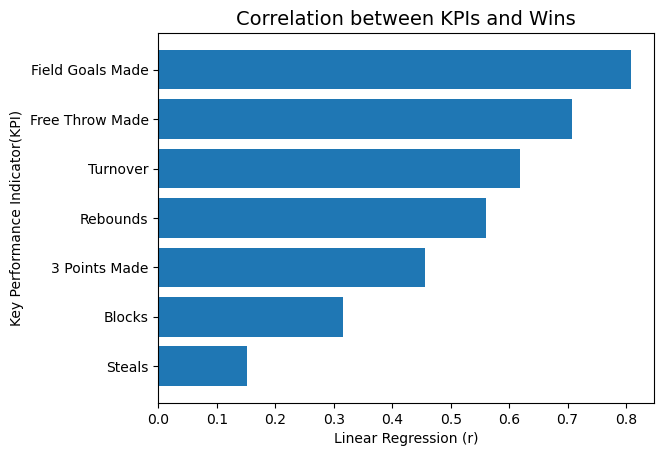

In [44]:
plt.barh(magic_rvalues["KPI"], magic_rvalues["r"])
plt.title("Correlation between KPIs and Wins", size=14)
plt.xlabel("Linear Regression (r)")
plt.ylabel("Key Performance Indicator(KPI)")
plt.show()

##### Analysis: According to the Pearson Correlation Coefficient Table the KPIs all had a positive relations to wins, however, the ones that had a strong positive relationship with Wins are: Field Goals Made, Free Throws Made, and Rebounds. Whilst, 3 Points made shows a moderate positive effect on Wins. The KPIs least related to Wins are: Steals and Blocks.